In [75]:
import numpy as np
import scipy as sp
import pandas as pd
import sympy as sym
import seaborn as sns
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")

###  How to create a basic array
This section covers np.array(), np.zeros(), np.ones(), np.empty(), np.arange(), np.linspace(), dtype


In [ ]:
# b = np.array([.5, 35, 'toto'])   # a mixed numpy array. 
# c = np.array([x**3 for x in range(51)])     # numpy list comprehension
# np.zeros(100)
# np.empty(20)
# np.arange(4)
# np.arange(2, 9, 2)
# x = np.linspace(-1, 4, 11)    # create 10 evenly spaced points between 1 and 4
#                                 #between 1 and 4
# np.linspace(0,9,9,endpoint=False)

In [20]:
a = np.array([1, 2, 47, 5,7.3, 7, 0, 4, 15])
a[-1]     # returns the last element in a
a[0]   # returns the first element in a
a[2:5]     # returns elements from index 2 to index 4
a[1:6:2]   # returns elements from index 2 to index 4
           #taking only the 2nd elements
a[a != 4]
five_up = (a >= 5)
print(a)
print(five_up)
a[(a > 2) & (a < 11)]
a[five_up]

[ 1.   2.  47.   5.   7.3  7.   0.   4.  15. ]
[False False  True  True  True  True False False  True]


array([47. ,  5. ,  7.3,  7. , 15. ])

In [21]:
np.identity(4) # return the 4x4 identity matrix 

print(np.zeros((5,4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [22]:
# help(np.eye)
np.eye(4,4, k=-1) # return the 4x4 identity matrix 

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [23]:
np.random.randint(-2,5, size=(2, 4))

array([[-1, -2, -2, -2],
       [ 1,  0,  1,  4]])

In [24]:
Mat = np.array([np.arange(6),np.arange(10,16),np.arange(20,26),np.arange(30,36),
                np.arange(40,46),np.arange(50,56)])
print(Mat)
Mat[[1,2, 4],[0,2,4]]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


array([10, 22, 44])

One can create an array from existing array by modifying its dimensions. This can be done using
- reshape method
- shape attribute

Remark: unlike the shape attribute, the reshape method doesn't modify the the initial matrix

In [25]:
a = np.array([1,-2,2,0,3,1,-1,-1,0], dtype = float) # a vector of floats
print("intial a :",a)
a = a.reshape(3,3)

# a = np.array([1,-2,2,0,3,1,-1,-1,0], dtype = float) # a vector of floats
# a.shape = 3,3

intial a : [ 1. -2.  2.  0.  3.  1. -1. -1.  0.]


You can also stack two existing arrays, both vertically and horizontally by using np.vstack(), np.hstack(), respectively.

In [26]:
M1 = np.array([[1, -12],[3, 2]])
M2 = np.array([[4, 2],[8, 1]])
# print(np.vstack((M1, M2)))
print(np.hstack((M1, M2)))

[[  1 -12   4   2]
 [  3   2   8   1]]


#### f. Basic array operations on NumPy arrays.
NumPy provides element-wise operations on arrays called vectorization, in particular arithmetic
operations +,-,*, /, //, % are applied element by element to an array.

In [27]:
a = np.array([4, 2, -2], dtype = float)     #create an array of floats
b =np.array([1, 0, -1]) #create an array of integer
print(a + b)    # vectors addition (vector must have same dimension)
print(a-b)
a**2

[ 5.  2. -3.]
[ 3.  2. -1.]


array([16.,  4.,  4.])

In [28]:
z = np.linspace(-5,5,3)
f = lambda x: x**2
f(z)

def g(x):
    y = (x+1)**2
    return y
g(z)



array([25.,  0., 25.])

#### Vectorizing a function

In [29]:
def f1(x):
    if x > 0:
        return 2*x
    else:
        return 1+x

z = np.linspace(-5,5,3) 
g1 = np.vectorize(f1)
g1(z)

array([-4.,  1., 10.])

**Exercise**

Define the function f (x) = 2x if x > 0 and f (x) = 1 − x otherwise and calculate f(v) for v = np.array([−2, −1, 0, 1, 2, 3]).

In [31]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b
vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4], [2,2,3,2])

array([3, 4, 6, 2])

####  Array functions, methods, attributes

In [ ]:
# A = np.array([1,2,3,7,-1,5])
# B = np.array([[1,2],[3,7],[-1,5]])
# print('Dimensions of A:', A.ndim)
# print('Shape of A:', A.shape)
# print('Size of A:', A.size)
# A.max()
# A.sum()
# A.prod()
# A.mean()
# A.std()
# print("================================")
# print('Dimensions of B:', B.ndim)
# print('Shape of B:', B.shape)
# print('Size of B:', B.size)

In [33]:
B = np.array([[1,2],[3,7],[-1,5]])
B.flatten()
# B # Note that this does not change the initial B 

array([ 1,  2,  3,  7, -1,  5])

You can specify on which axis you want the aggregation function to be computed:
- **axis=0** for within each column
- **axis=1** for within each row
. For example, you can find the minimum value within each column by specifying .

In [34]:
B = np.array([[1,2],[3,7],[-1,5]])
print("min_per_col = ",B.std(axis=0))#minimum value within each column
print("min_per_row = ",B.min(axis=1))#minimum value within each row

min_per_col =  [1.63299316 2.05480467]
min_per_row =  [ 1  3 -1]


In [37]:
a = np.array([-4,-2])
b = np.array([2, 5])
m = np.array([[1,2], [3,4]]) 
a*b # dot product = inner product=scalar product


print(np.dot(a,b))    # matrix multiplications
print(a@b)

print(m.T) #return the transpose of a function
np.diagonal(m)    # return the elements on the diagonal
print(np.trace(m)) # return trace or the sum of the diagonal elements

-18
-18
[[1 3]
 [2 4]]
5


####  Inverting a non-singular square matrix, the linear algebra sub-module

In [40]:
a = np.array([[1,-1,0],[-2,1,2],[0,1,2]])
np.linalg.det(a) #determinant
b = np.linalg.inv(a) # returns the inverse of a
e_values, e_vectors = np.linalg.eig(a) # returns the eigenvalues and right
# eigenvector of a square array

#### j. Polynomial computation with NumPy

Polynomials The polynomial $P = 2x^3 − x^2 − 5$ can be represented by the numpy array [2, −1, 0, −5]

In [43]:
P = np.poly1d([2,-1, 0, -5])
#print(np.poly1d(P))
np.polyval(P,0)      # evaluating a polynomial
Q = np.poly1d([1,0,2,-1])
P+Q
t=P*Q

### System of equations in python

#### system of linear equations
write a python code to solve the following linear equations
\begin{equation}
\begin{cases}
    3x -9y = -42\\
    2x+ 4y = 2
\end{cases}
\end{equation}

\begin{equation}
  \begin{cases}
    x - 2y -z = 6\\
    2x + 2y -z = 1\\
    -x - y +2z = 1\\
  \end{cases}.
\end{equation}


In [46]:
A = np.array([ [3,-9], [2,4] ])
b = np.array([-42, 2])
# A1 = np.linalg.inv(A)
# Z = A1@b
z = np.linalg.solve(A,b)
print(z.shape)
print("x = ",z[0], "y = ",z[1])
# print("x=",z,"y = ",z)
# print("x = ",z[0,0],"y = ",z[1,0])

# M = np.array([ [1,-2,-1], [2,2,-1], [-1,-1,2] ])
# c = np.array([6,1,1])
# y = np.linalg.solve(M,c)
# print(y)


(2,)
x =  -5.0 y =  3.0


#### system of non-linear equations
write a python code to solve the following nonlinear equations
\begin{equation}
\begin{cases}
    x + y^2 = 4\\
    e^x+ xy = 1
\end{cases}
\end{equation}

\begin{equation}
  \begin{cases}
    x\cos y = 4\\
    xy -y = 5
  \end{cases}.
\end{equation}

\begin{equation}
  \begin{cases}
    x^2 + y^2 = 20\\
    y - x^2 = 0\\
    w - xy = -5
  \end{cases}.
\end{equation}


In [50]:

def myFunction(z):
    x = z[0]
    y = z[1]
    w = z[2]

    F = np.empty((3))
    F[0] = x**2+y**2-20
    F[1] = y - x**2
    F[2] = w + 5 - x*y
    return F

zGuess = np.array([0,1,1])
g = fsolve(myFunction,zGuess)
print(g)

[2. 4. 3.]


#### system of equations - symbolic solution

write a python code to solve the following nonlinear equations (Symbolic Solution)
\begin{equation}
  \begin{cases}
    2x^2 + y +z = 1\\
    x + 2y +z = c_1\\
    -2x + y = -z
  \end{cases}.
\end{equation}


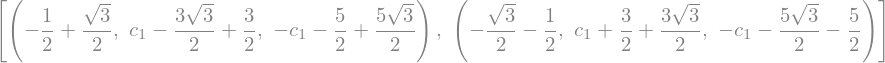

In [52]:
sym.init_printing()

x,y,z = sym.symbols('x,y,z')

c1 = sym.Symbol('c1')

f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))



### 1.3. Integrals in python

Compute the following integrals

$A =\int_1^2 (x^7 − 1)^3 dx$



$B= \int_0^{+\infty} e^{-\dfrac{1}{2}x}dx$.

$C =\int_1^2 2x dx$

In [54]:
a = 1
b = 2
f = lambda x: (x**7-1)**3
A = quad(f, a, b)[0]
print(A)

184191.3613636364


In [55]:
g = lambda x: np.exp(-0.5*x)
B = quad(g,0, np.inf)[0]
print(B)

2.0


### 1.4. Solve ODEs in Python  
An example of using ODEINT is with the following differential equation with parameter k=0.3, the initial condition y0=5 and the following differential equation.

\begin{equation}
\frac{dy}{dt} = -ky
\end{equation}

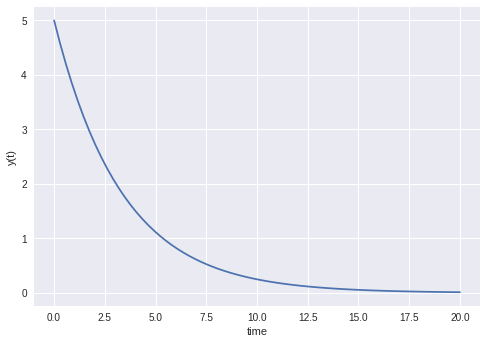

In [57]:
# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
ya = 5

# time points
a = 0
b = 20
N = 70
t = np.linspace(a,b,N)

# solve ODE
y = odeint(model,ya,t)

# plot results
# plt.plot(t,y)
# plt.xlabel('time')
# plt.ylabel('y(t)')
# plt.show()


### 1.5. Solve system of ODEs in Python

Solve the simple differential systems, which consists of two variables and two differential equations and initial conditions x(t=0)=1, y(t=0)=2:
\begin{equation}
  \begin{cases}
   \dfrac{d x}{d t}=5x-3y \\\\
\dfrac{d y}{d t}=-6x+2y   
  \end{cases},  \text{ on } [0,1]
\end{equation}

In [59]:
def model(z,t):
    x,y = z
    dxdt = 5*x-3*y 
    dydt = -6*x +2*y
    return np.array([dxdt,dydt])

# initial condition
z0 = np.array([1,2])

# time points
a = 0
b = 1
N = 100
t = np.linspace(a,b,N+1)

# solve ODE
z = odeint(model,z0,t)

x = z[:,0]
y = z[:,1]


# # plot results
# plt.figure(figsize=(15,6))
# plt.subplot(1,3,1)
# plt.plot(t,x)
# plt.xlabel('time')
# plt.ylabel('x(t)')
# # plt.show()
# # plot results
# plt.subplot(1,3,2)
# plt.plot(t,y)
# plt.xlabel('time')
# plt.ylabel('y(t)')
# # plt.show()
# # plot results
# plt.subplot(1,3,3)
# plt.plot(x,y)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()


# Data Visualization plotting

## Saving Figures to File

In [4]:
#plt.style.use('classic')
# x = np.linspace(0, 10, 100) 
# fig = plt.figure()
# plt.plot(x, np.sin(x), '-')
# plt.plot(x, np.cos(x), '--')
# fig.savefig('my_figure.png')   # calling savefig function to save the plot

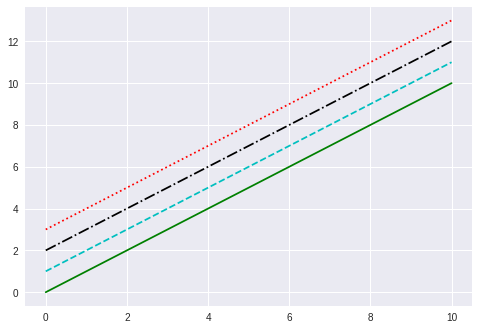

In [5]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

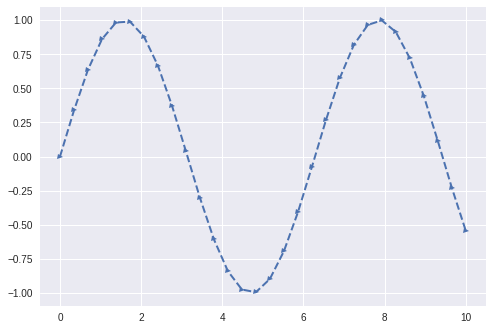

In [6]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=2, markersize=5);

## Adjusting the axes limits

The axes are adjusted by using `xlim` and `ylim` functions.\newline
Alternatively, one can use the `axis` function. `axis()` method allows you to set the `x` and `y` limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

In [9]:
# plt.plot(x, np.sin(x))
# plt.xlim(-1, 11)         # changing the limits of the x-axis
# plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

# plt.plot(x, np.sin(x))
# plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

## Labeling plots and scater 

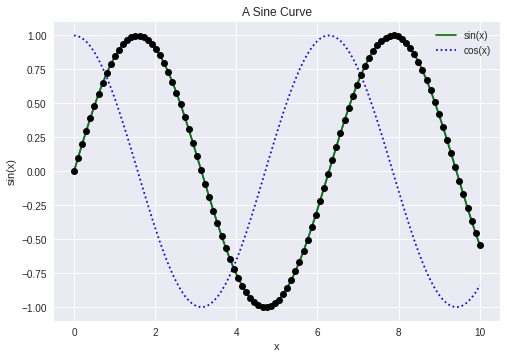

In [13]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 


plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend


# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'ok');

## Plotting Histogram

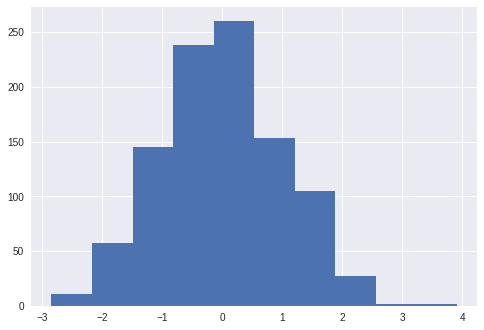

In [14]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

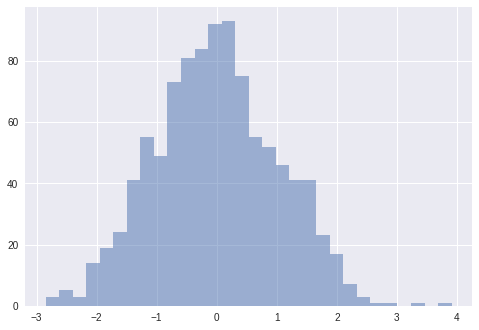

In [15]:
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

### Simple Grids of Subplots

In [16]:
# plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
# for i in range(1, 7):
#     plt.subplot(2, 3, i)
#     plt.text(0.5, 0.5, str((2, 3, i)),
#              fontsize=18, ha='center')

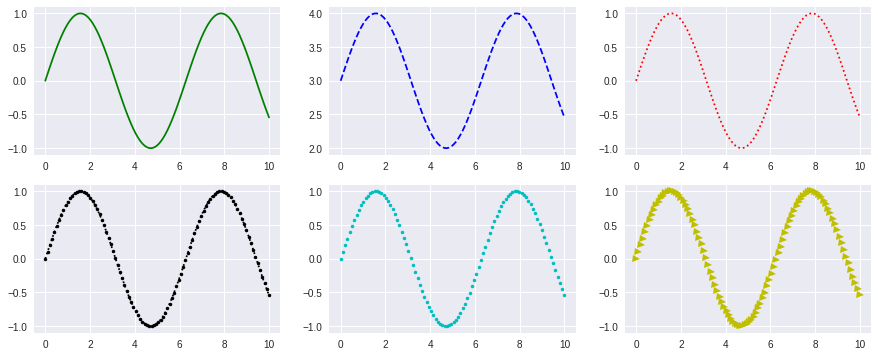

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');

# plt.figure(figsize=(15,6))
# plt.subplot(2, 3, (1,2))
# plt.plot(x, np.sin(x) + 0, 'g')
# plt.subplot(2, 3, (3,6))
# plt.plot(x, np.sin(x) + 0, ':r')
# plt.subplot(2, 3, 4)
# plt.plot(x, np.sin(x) + 0, ':.k')
# plt.subplot(2, 3, 5)
# plt.plot(x, np.sin(x) + 0, '.c')

## Text and Annotation

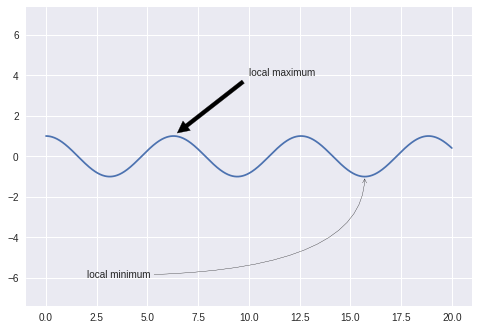

In [19]:
# plt.axis([0, 10, 0, 10])
# plt.text(1, 5, "Data (1, 5)")
# plt.text(0.5, 0.1, "Point (0.5, 0.1)")
# plt.text(6, 7.5, "Gradient (0.2, 0.2)")


x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

# 1. Data Structure

In [70]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
data2.index#ACCESS LOW
data2.columns#ACEESS COLUMN
data2.describe() #DESCIBE ALL NUMEICAL ROWS
data2.loc['Maths',:].describe() #DESCIBE MENTOINED NUMEICAL ROWS
data2.corr()
data2.max()
data2.loc['Maths',:].max()
data2.cov()
data2.std()
data2.mean()




GradeS1    73.800000
GradeS2    80.857143
dtype: float64

In [66]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics'])#Create another data frame with some index of data2
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics', 'elvira'], 
                columns= ('Grade12', 'GradeS2','GradeS1'))
d

,Grade12,GradeS2,GradeS1
Maths,NaN,90.0,70.0
Physics,NaN,88.0,98.0
Economics,NaN,76.0,NaN
elvira,NaN,NaN,NaN


# 2. Reading and Writing Data

## 2.1 <b> pandas: Data Ingestion (Reading) </b>
- Functions such as <font color = red> ‘read_excel’, ‘read_csv’, 'read_json', 'read_html', 'read_sql_query', 'read_sql_table' </b>, etc.

<b> Syntax: pandas.function(file_directory) </b>

In [104]:
df = pd.read_csv('flight_data.csv')
print(df.shape)
df.shape
df.head(2)

(336776, 19)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00


To reduce the amount of data we will be working with and make things a little easier, lets only look at Alaska Airlines flights leaving from New York City in 2013. This can be done by subsetting the data in such a way that we only observe flights from Alaska Airlines (carrier code AS), as follows;

In [105]:
Alaska = df[df['carrier'] == 'AS']

This essentially picks out all of the rows within the flights data set for which the carrier code is AS and discards the rest, thus creating a new data set entitled Alaska. To observe the Alaska data we can use the following commands:

In [106]:
Alaska.head()
Alaska.shape

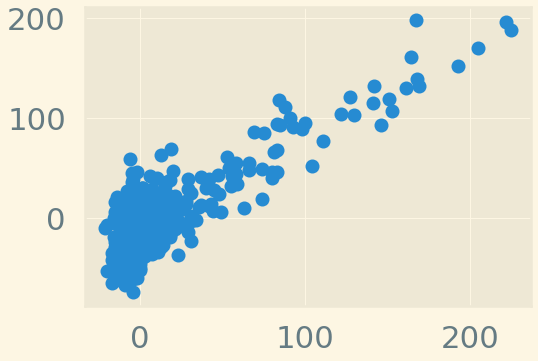

In [107]:
#Scatterplots
plt.style.use('Solarize_Light2')
plt.scatter('dep_delay', 'arr_delay', data=Alaska); 

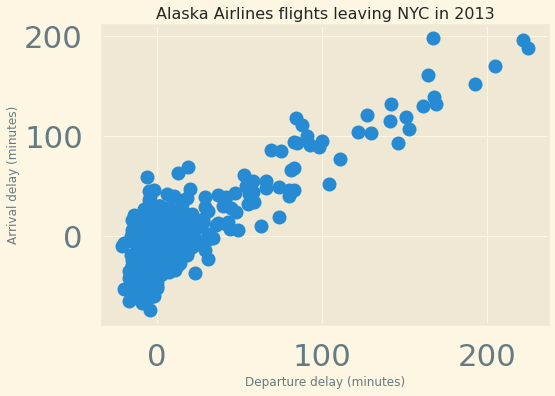

In [108]:
#Adding labels to the axes
plt.scatter('dep_delay', 'arr_delay', data=Alaska)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

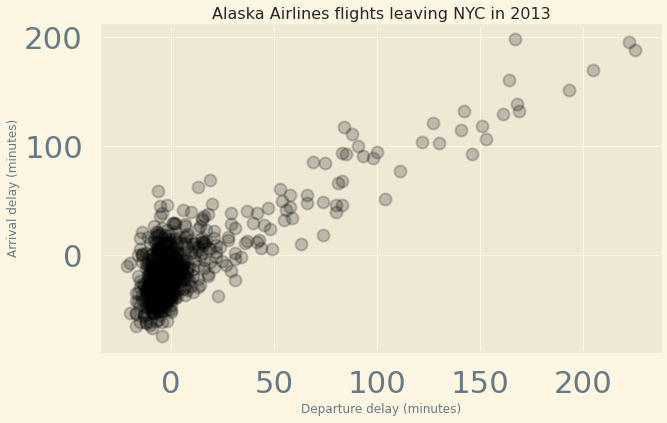

In [109]:
plt.figure(figsize=(10,6))
plt.scatter('dep_delay', 'arr_delay', data=Alaska, color='k', alpha=0.2)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

In [111]:
#Histograms
weather = pd.read_csv('weather.csv')
weather.head(2)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z


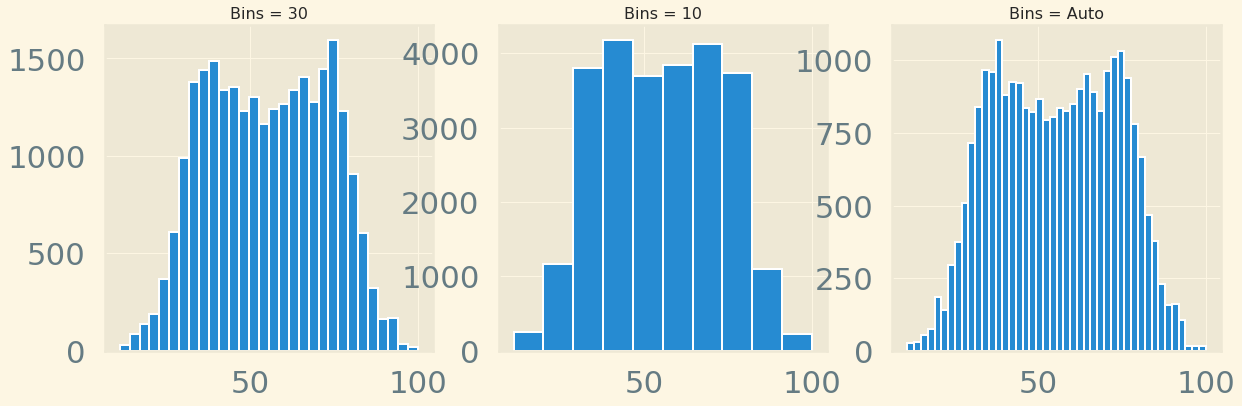

In [113]:
# plt.hist(weather['temp']); #plot barchat
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Bins = 30')
weather['temp'].hist(bins=30)

plt.subplot(1,3,2)
plt.title('Bins = 10')
weather['temp'].hist(bins=10)

plt.subplot(1,3,3)
plt.title('Bins = Auto')
weather['temp'].hist(bins='auto')

plt.show()

# plt.style.use('Solarize_Light2')
# plt.hist(weather['temp'], bins='auto', color='#0504aa', alpha=0.7)
# plt.xlabel('Temperature (Hourly)')
# plt.title('Hourly temperature from NYC in 2013')
# plt.show()

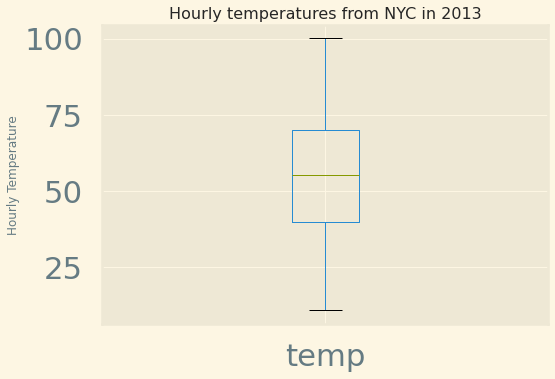

In [114]:
#Boxplot
weather.boxplot('temp')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
plt.show()

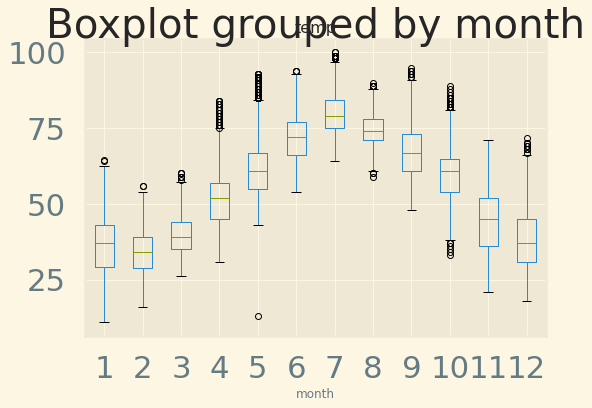

In [115]:
weather.boxplot('temp', by='month');

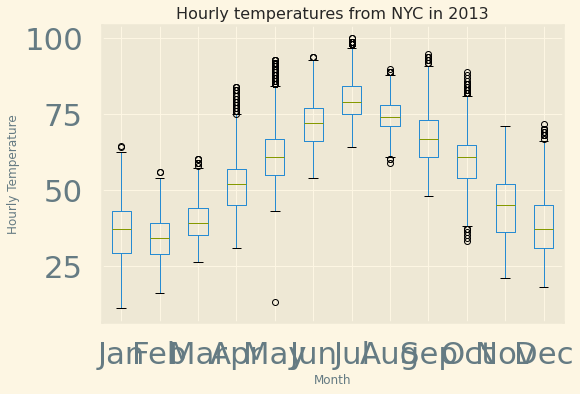

In [116]:
weather.boxplot('temp', by='month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(list(range(1, 13)), months);

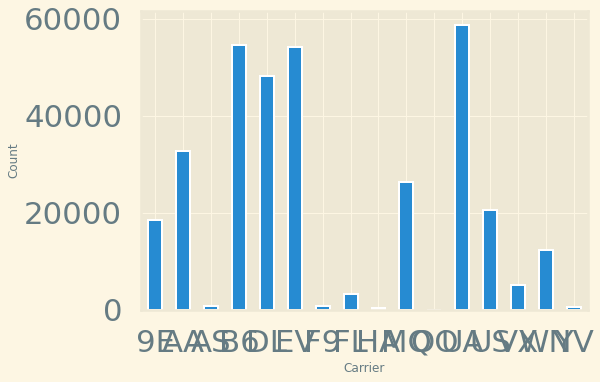

In [117]:
# Barplots
df.groupby('carrier').size().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

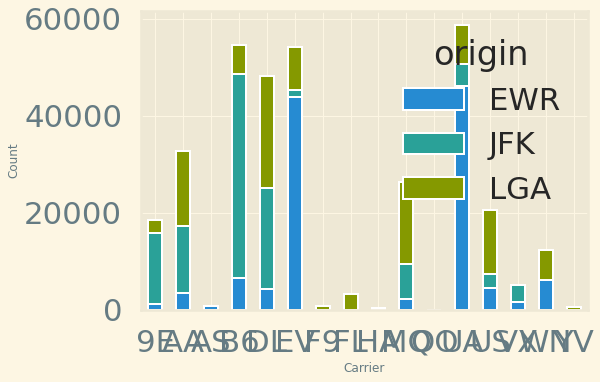

In [118]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

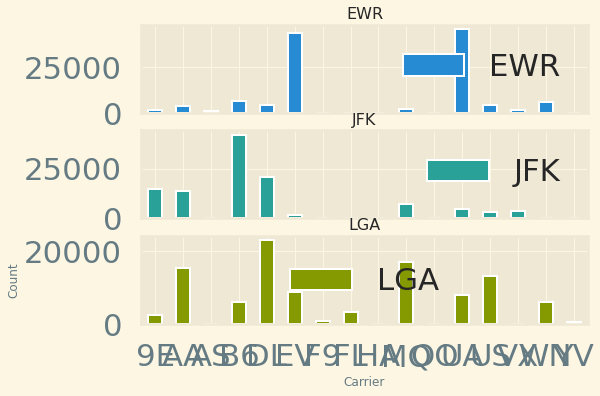

In [119]:
#Faceted barplot
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', subplots=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

Text(0, 0.5, 'Count')

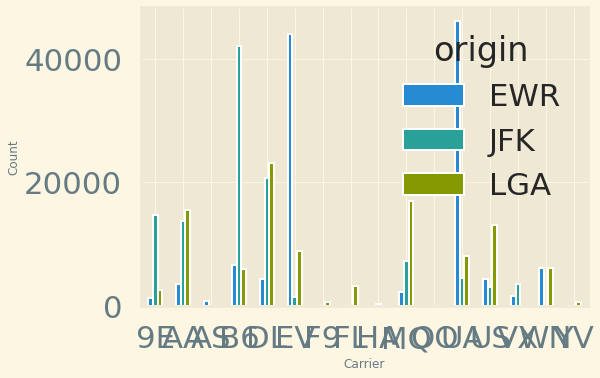

In [120]:
#side-by-side barplot
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count')

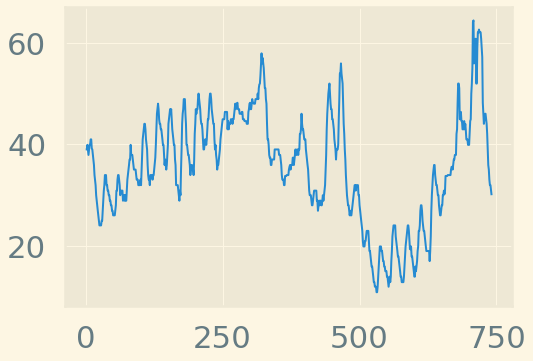

In [122]:
Newark_Jan = weather[(weather['origin'] == 'EWR') & (weather['month'] == 1)]
Newark_Jan
plt.plot(Newark_Jan['temp']);

# Seaborn Tutorial

In [76]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

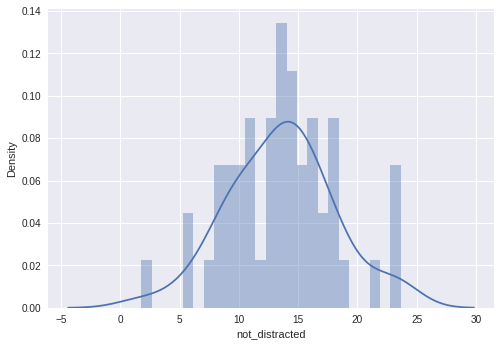

In [80]:
# cs_df#DISPLAY TABLE
#crash_df.head() 

#Distribution Plot
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

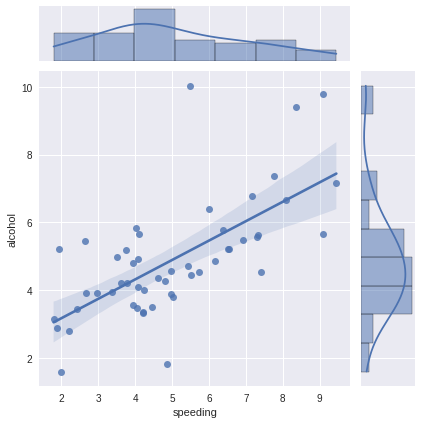

In [81]:
#Joint Plot
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

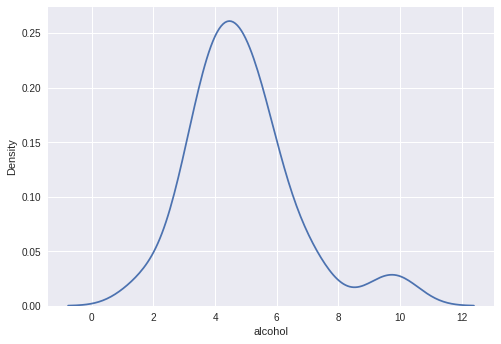

In [82]:
# KDE Plot
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

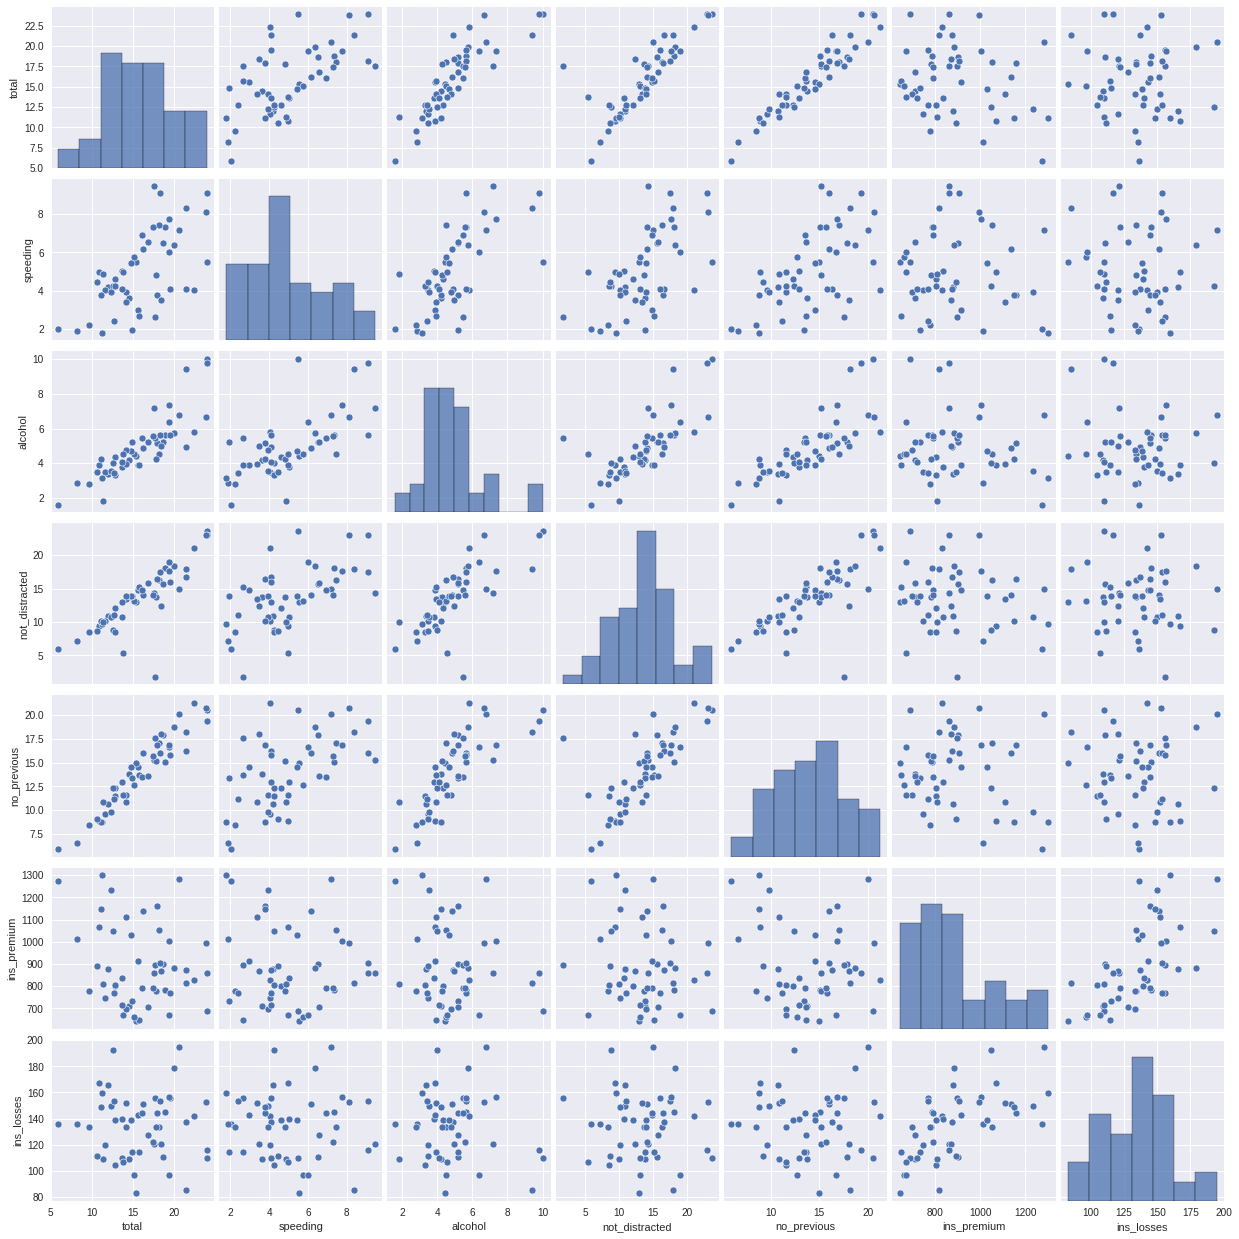

In [83]:
#Pair Plots
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

<Figure size 576x288 with 0 Axes>

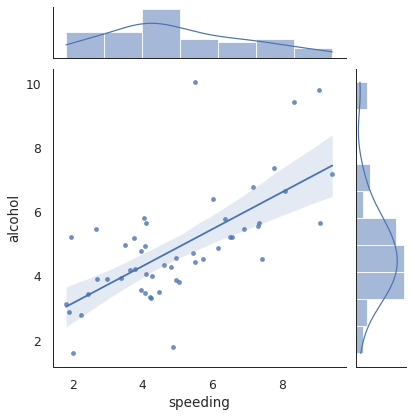

In [84]:
#Styling
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

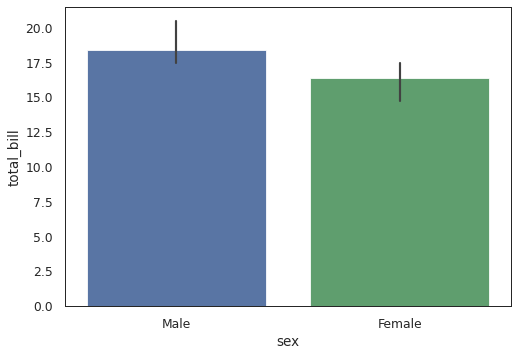

In [85]:
#Bar Plots
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

<AxesSubplot:xlabel='sex', ylabel='count'>

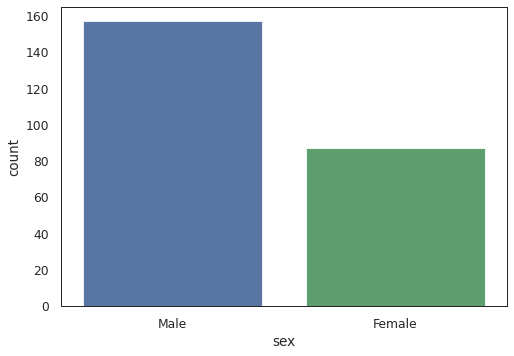

In [86]:
#Count Plot
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex', data=tips_df)


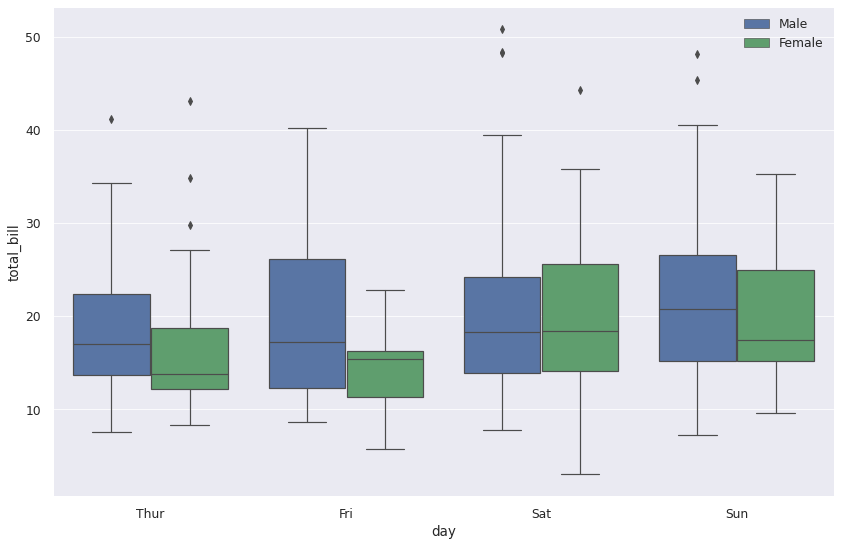

In [87]:
#Box Plot
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

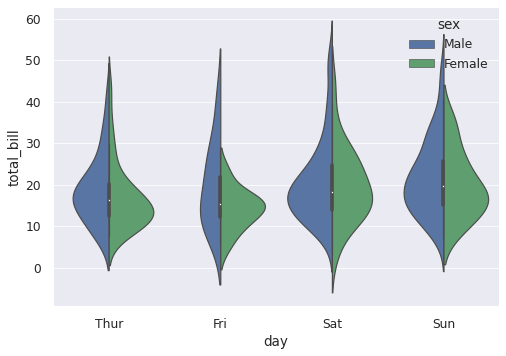

In [88]:
#Violin Plot
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

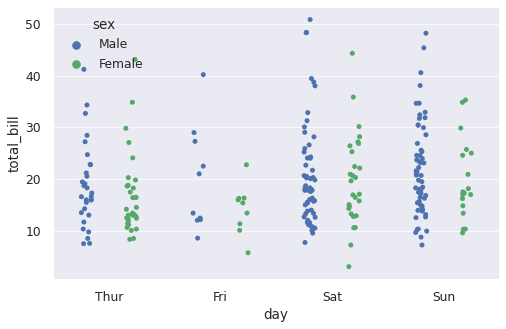

In [89]:
#Strip Plot
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

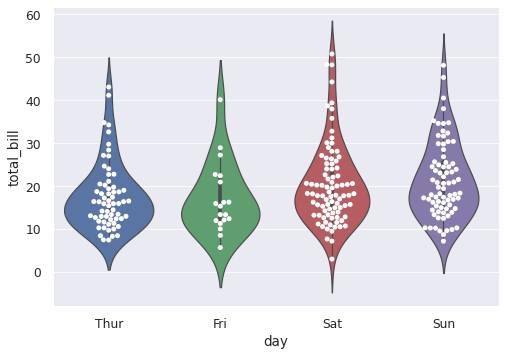

In [90]:
#Swarm Plot
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


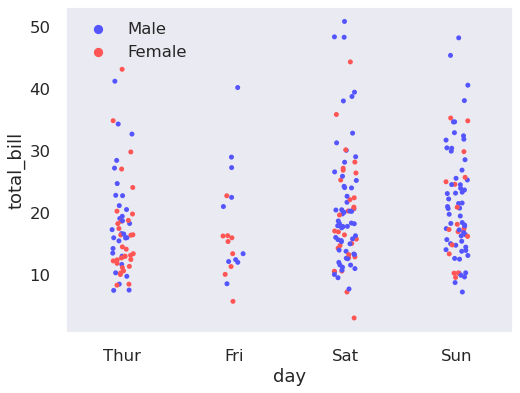

In [91]:
# Palettes
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

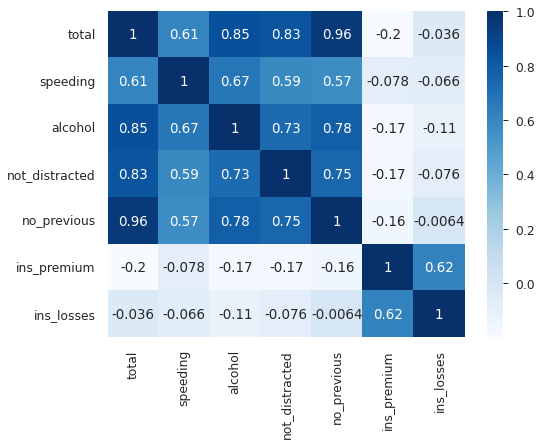

In [92]:
#Heatmaps
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

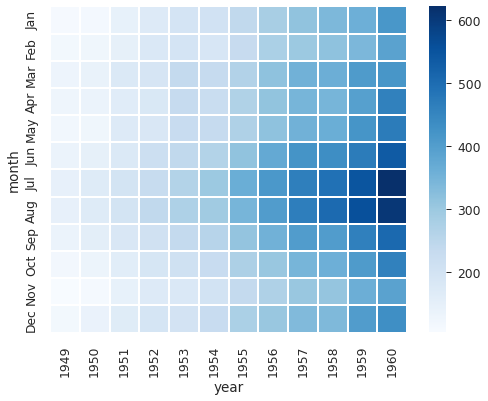

In [93]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

<Figure size 576x432 with 0 Axes>

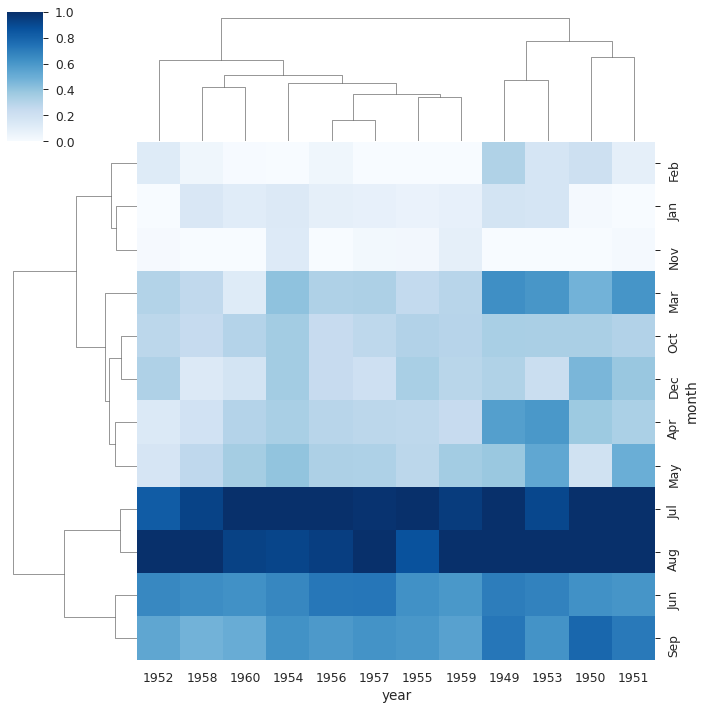

In [94]:
#Cluster Map
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)


<Figure size 576x432 with 0 Axes>

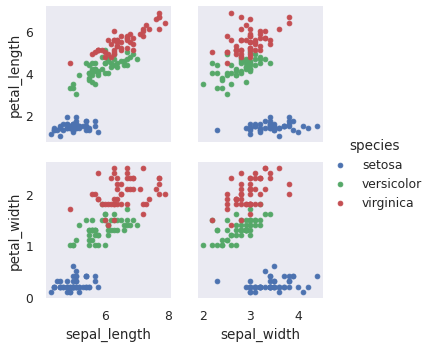

In [95]:
#PairGrid
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend();

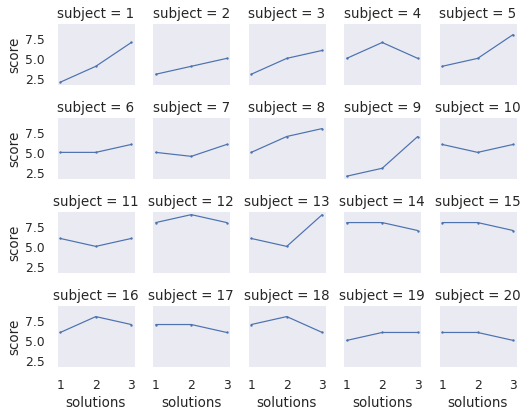

In [96]:
#Facet Grid
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.');

In [97]:
#Regression Plots
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

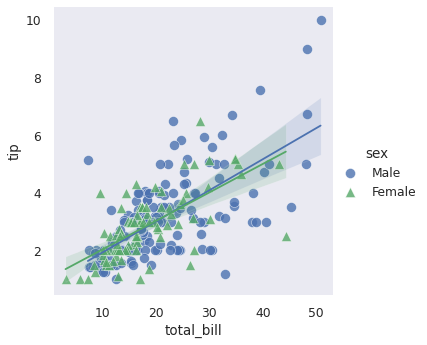

In [98]:
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

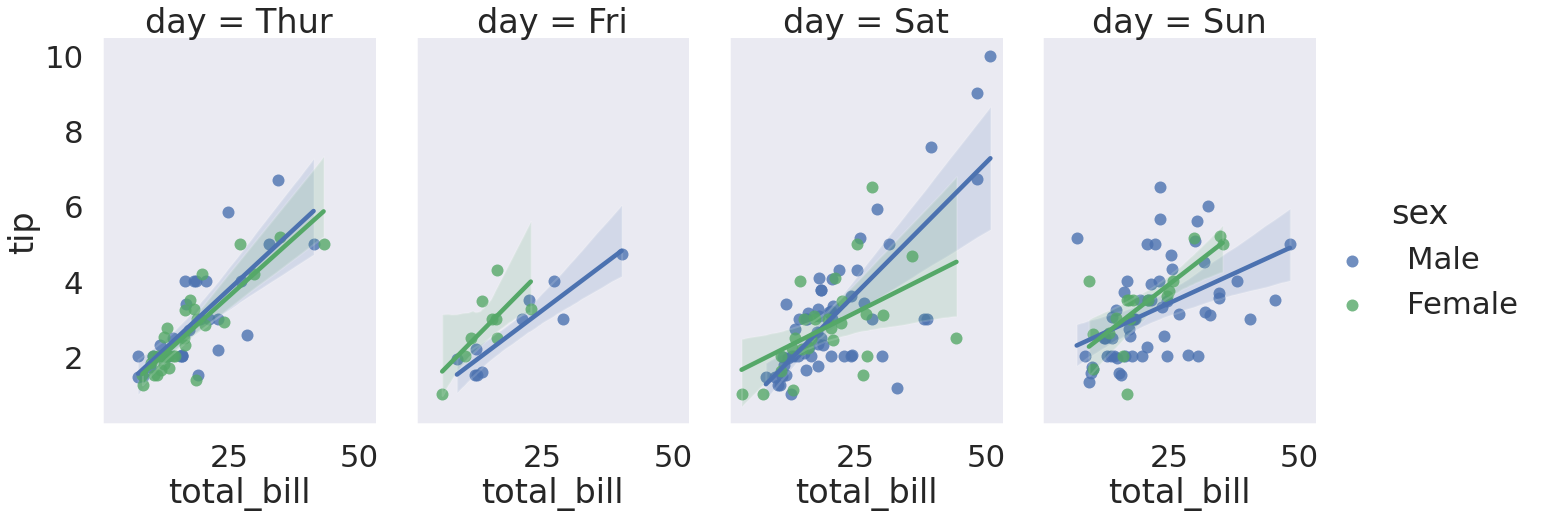

In [99]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);

# question and answer

1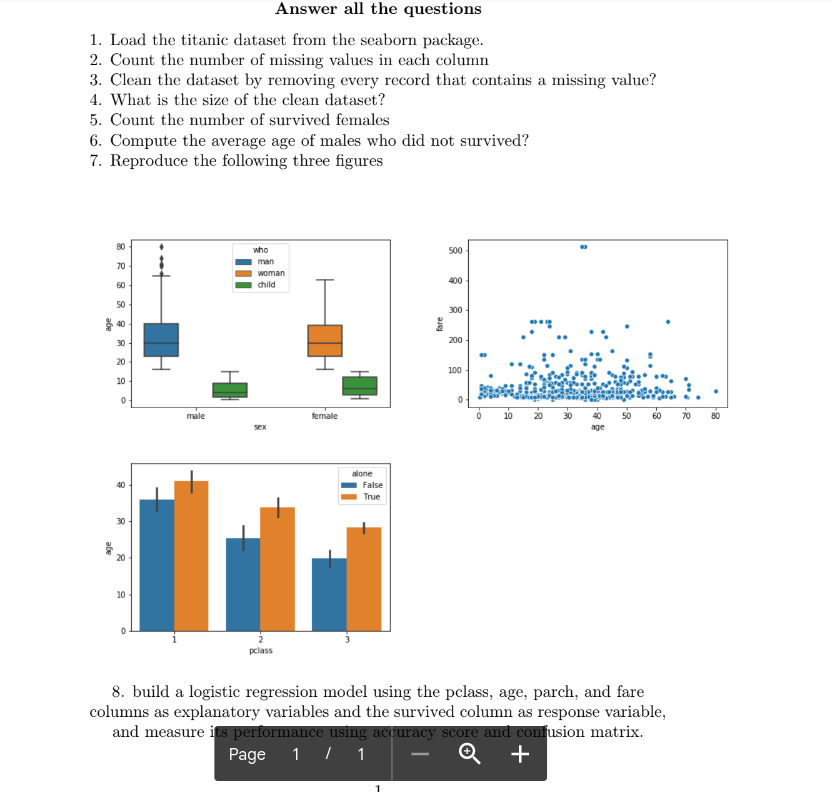

In [125]:
import numpy as np
import seaborn as sb
datas = sb.load_dataset("titanic")
datas.shape
datas.head(3)
datas.isnull().sum()
datas.drop(columns = ['deck'], inplace = True)
datas.dropna(axis = 0, inplace = True)
datas.shape
datas.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


In [126]:
datas.loc[(datas['sex'] == 'female') & (datas['survived'] == 1)].shape[0]

In [127]:
datas.loc[(datas['sex'] == 'male') & (datas['survived'] == 0)].mean()[2]

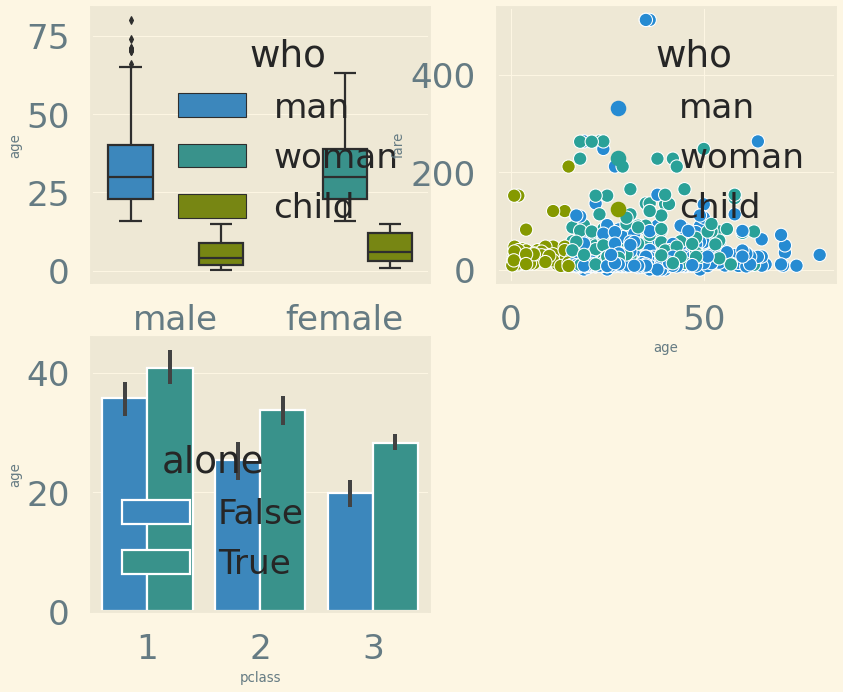

In [130]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,2,1)
sb.boxplot(x="sex", y="age", hue="who", data=datas)

plt.subplot(2,2,2)
sb.scatterplot(x="age", y="fare",hue="who", data=datas)

plt.subplot(2,2,3)
sb.barplot(x="pclass", y="age", hue="alone", data=datas)

plt.show()

2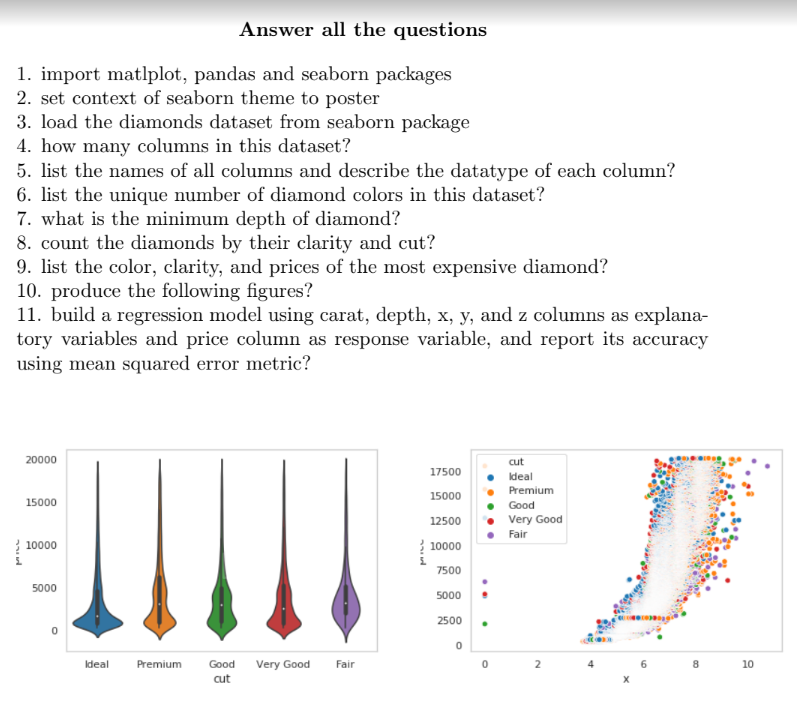

In [132]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
sb.set_context('poster')
set1  = sb.load_dataset('diamonds')
set1.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [134]:
# set1.shape[1]
# set1.info()

In [141]:
print(list(set1['color'].unique()))

['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [136]:
set1['depth'].min()

In [138]:
#set1.groupby(by = ['clarity', 'cut']).count().iloc[:,0]

In [139]:
set1.loc[set1['price'] == set1['price'].max()].iloc[:,[2,3,6]]

,color,clarity,price
27749,I,VS2,18823


<AxesSubplot:xlabel='x', ylabel='price'>

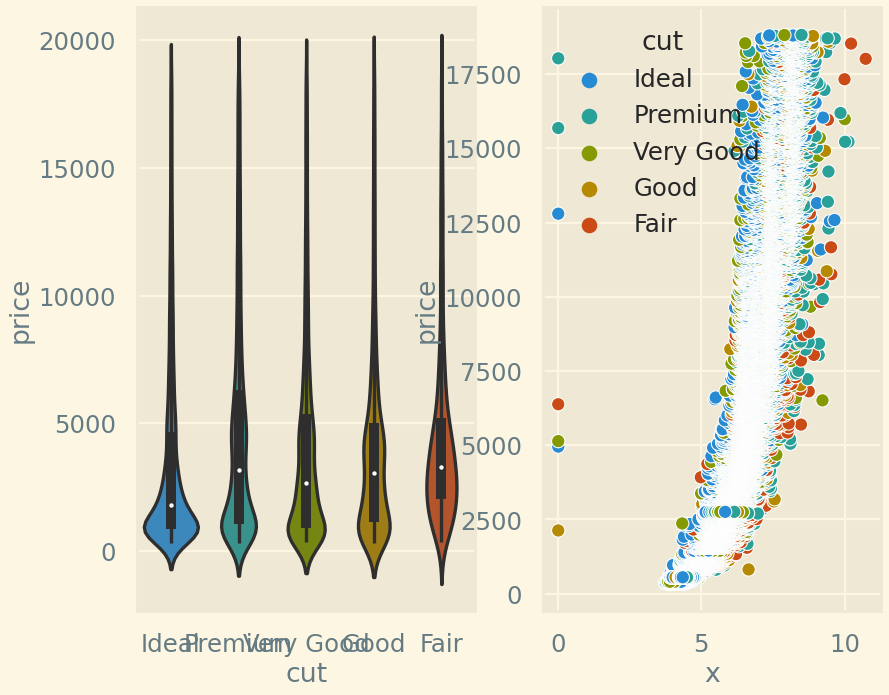

In [140]:
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(1,2,1)
sb.violinplot(x='cut',y='price',data=set1)
plt.subplot(1,2,2)
sb.scatterplot(x='x',y='price',hue='cut',data=set1)

3
$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [142]:
def model(z, t):
    x1, x2, x3 = z
    
    dx1_dt = -0.5*x1
    dx2_dt = 0.5*x1 - 0.25*x2
    dx3_dt = 0.25*x2 - (1/6)*x3
    
    return np.array([dx1_dt, dx2_dt, dx3_dt])

z0 = [1,1,1]
a, b, N = 0, 4, 200
t = np.linspace(a, b, N)

z = odeint(model, z0, t)
z.shape

4
2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 

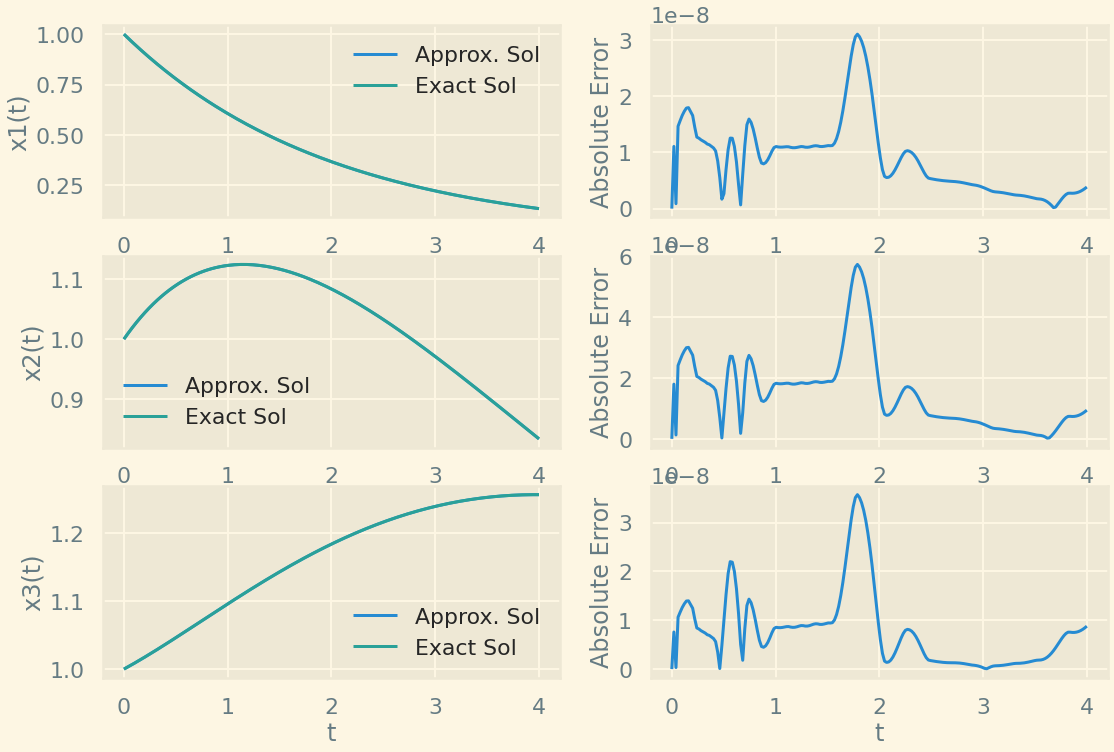

In [144]:
X1 = np.exp(-t/2)
X2 = -2*np.exp(-t/2) + 3*np.exp(-t/4)
X3 = 1.5*np.exp(-t/2) - 9*np.exp(-t/4) + 8.5*np.exp(-t/6)

plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1)
plt.plot(t, z[:, 0], label='Approx. Sol')
plt.plot(t, X1, label='Exact Sol')
plt.xlabel('t')
plt.ylabel('x1(t)')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(t, abs(z[:, 0] - X1))
plt.xlabel('t')
plt.ylabel('Absolute Error')

plt.subplot(3, 2, 3)
plt.plot(t, z[:, 1], label='Approx. Sol')
plt.plot(t, X2, label='Exact Sol')
plt.xlabel('t')
plt.ylabel('x2(t)')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(t, abs(z[:, 1] - X2))
plt.xlabel('t')
plt.ylabel('Absolute Error')

plt.subplot(3, 2, 5)
plt.plot(t, z[:, 2], label='Approx. Sol')
plt.plot(t, X3, label='Exact Sol')
plt.xlabel('t')
plt.ylabel('x3(t)')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(t, abs(z[:, 2] - X3))
plt.xlabel('t')
plt.ylabel('Absolute Error')

plt.show()


$\text{Exercise 5 a} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [145]:
def EulerOdeSys(f, c, t):
    H = t[1] - t[0]
    Z = np.zeros((len(t), len(c)))
    Z[0] = c
    for k in range(N-1):
        Z[k+1] = Z[k] + H*f(Z[k], t[k])
        
    return Z

b. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [147]:
def RK4OdeSys(f, c, t):
    H = t[1] - t[0]
    Z = np.zeros((len(t), len(c)))
    Z[0] = c
    for k in range(N-1):
        k1 = f(Z[k], t[k])
        k2 = f(Z[k] + H*0.5*k1, t[k] + 0.5*H)
        k3 = f(Z[k] + H*0.5*k2, t[k] + 0.5*H)
        k4 = f(Z[k] + H*k3, t[k] + H)
        Z[k+1] = Z[k] + (H/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return Z

c. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [148]:
z0 = np.array([1,1,1])
a, b, N = 0, 4, 200
t = np.linspace(a, b, N)

z_eul = EulerOdeSys(model, z0, t)
z_rk4 = RK4OdeSys(model, z0, t)

z_eul.shape, z_rk4.shape

d. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

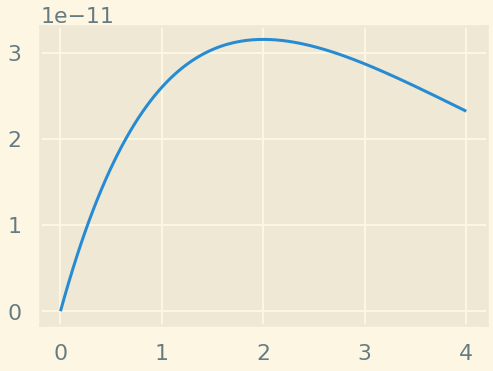

In [150]:
# plt.plot(t, abs(z[:, 0] - X1), label='odeint')
# plt.plot(t, abs(z_eul[:, 0] - X1), label='euler')
plt.plot(t, abs(z_rk4[:, 0] - X1), label='RK4')
# plt.xlabel('t'); plt.ylabel('Absolute Error')
# plt.legend()

plt.show()

q6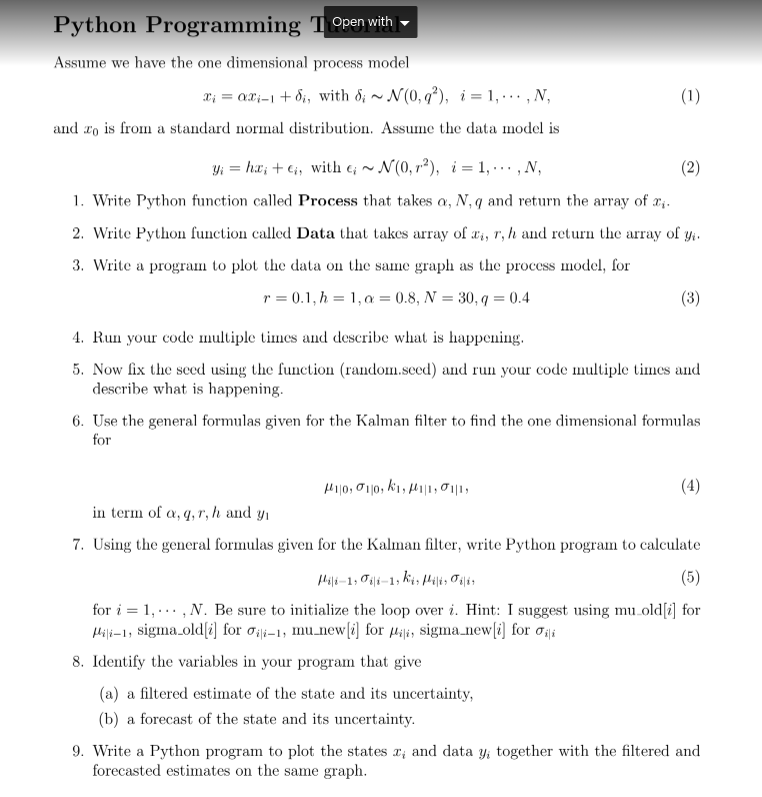



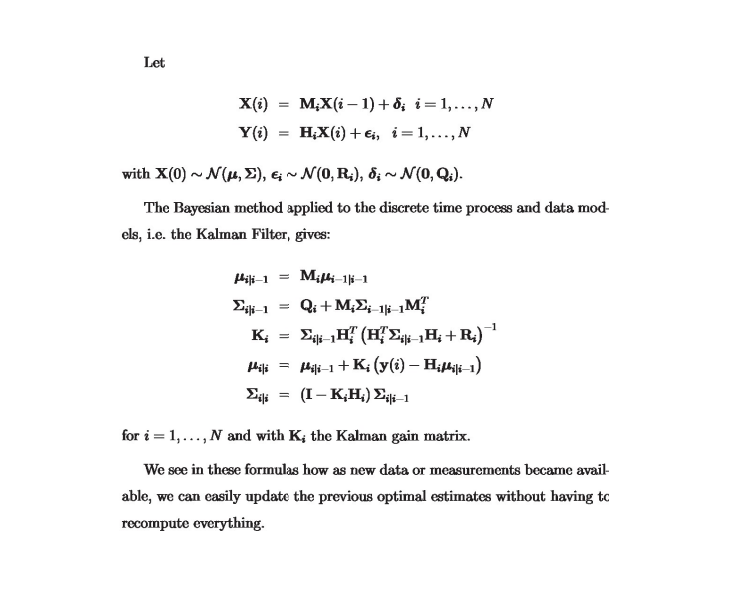

In [151]:
#ans6
import numpy as np
from scipy.integrate import odeint
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

sns.set_context("poster")
sns.set(style='whitegrid')

In [152]:
def Process(al, N, q):
    x = np.zeros(N+1)
    x[0] = np.random.normal(0,1)
    for i in range(1,N+1):
        x[i] = al*x[i-1] + np.random.normal(0, q)
    
    return x

In [153]:
def Data(x, r, h):
    y = h*x[1:] + np.random.normal(0, r, len(x)-1)
    
    return y

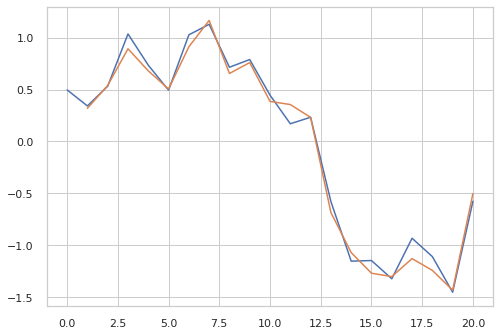

In [154]:
np.random.seed(42)
x = Process(0.8, 20, 0.4)
y = Data(x, 0.1, 1)

plt.plot(np.arange(0, len(x)), x)
plt.plot(np.arange(1, len(x)), y)
plt.show()

end of q6


**Exercise 7**  **

1- Write a function, **ReverCase**, that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

Test your function **ReverCase**.

In [155]:
#ans7
def ReverCase(s):
    s_new = ''.join([l.swapcase() for l in s if (l.swapcase() != l)])
    
    return s_new

print("Reverse case of 'AiMe, bAremA 2!!!' is:", ReverCase('AiMe, bAremA!!!'))

Reverse case of 'AiMe, bAremA 2!!!' is: aImEBaREMa


8- Write a function,**MaxNegMat** , that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Test your function **MaxNegMat**

In [156]:
#4pt
def MaxNegMat(M):
    n_rows = M.shape[0]
    M_max_neg = np.zeros(n_rows)
    for i in range(n_rows):
        M_max_neg[i] = CheckMaxNeg(M[i])
        
    return sum(M_max_neg)
    
def CheckMaxNeg(L):
    L_array = np.array(L)
    check_neg = L_array < 0
    if (sum(check_neg) > 0):
        return max(L_array[check_neg])
    return 0

M = np.array([[0,5], [-7,-1], [-5,-6]])
print("Sum of maximum strictly negative of M rows:", MaxNegMat(M))

Sum of maximum strictly negative of M rows: -6.0


9- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.



In [157]:
#3pt
def Trap(a, b, f, H=0.001):
    N = int((b-a) / H)
    x = np.linspace(a, b, N+1)
    Z = 0
    for k in range(1, N+1):
        Z += f(x[k-1]) + f(x[k])
    
    return Z * H / 2

**Exercise 10**  </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

- <font color=blue>Your function name should be **SODE** not **SODA**  </font>

- <font color=blue>According to the problem you may consoder to have function **function** inside the function **SODA**  </font>

In [159]:
#5pt
def function(z, x):
    y,v = z
    dydx = v
    dvdx = -2*v + 30 *( np.exp(3*x))
    return np.array([dydx, dvdx])

def SODA(a, b, H = 0.001):
    yi = np.array([2, 8])
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    solution = odeint(function , yi, x)
    return x, solution[:,0]

 Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

Text(0, 0.5, 'yk')

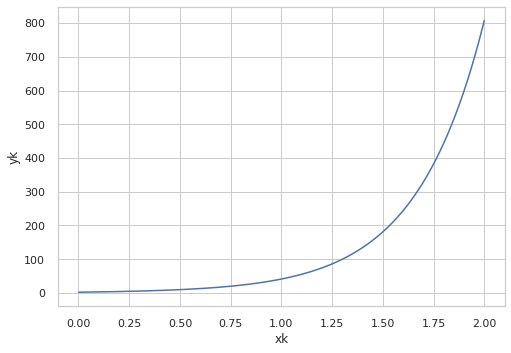

In [160]:
z = SODA(0, 2)
xk = z[0]
yk = z[1]
plt.plot(xk,yk)
plt.xlabel('xk')
plt.ylabel('yk')

- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

Text(0, 0.5, 'abs(yk - gk(xk)')

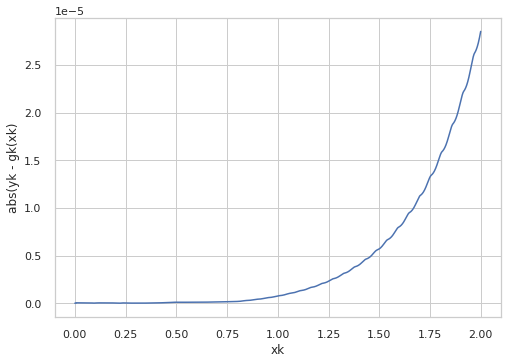

In [161]:
gk = lambda x : 2 * np.exp(3*x) - np.exp(-2*x) + 1

plt.plot(xk, abs(yk - gk(xk)))
plt.xlabel('xk')
plt.ylabel("abs(yk - gk(xk)")

Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_{k = 0}^N H(y_k - g_k)^2$$

In [162]:
def L2_error(a, b, H):
    YK = SODA(a,b,H)[1]
    GK = gk(SODA(a,b,H)[0])
    N = int((b-a)/H)
    total = 0
    for i in range(0, N+1):
        total += (H*(YK[i] - GK[i])**2)
    return total

Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [163]:

H = np.array([10**(-1),10**(-2),10**(-3),10**(-4)])
𝐿2𝐸𝑟𝑗 = np.array([L2_error(0, 2, 10**(-1)),L2_error(0, 2, 10**(-2)),L2_error(0, 2, 10**(-3)), L2_error(0, 2, 10**(-4))])
print("𝐿2𝐸𝑟𝑗 = ", 𝐿2𝐸𝑟𝑗)

𝐿2𝐸𝑟𝑗 =  [1.76688197e-10 1.34088211e-10 1.29754197e-10 1.31295082e-10]


Plot the array of $L2Er_j$ against the array of $H_j$.

Text(0, 0.5, 'L2Erj')

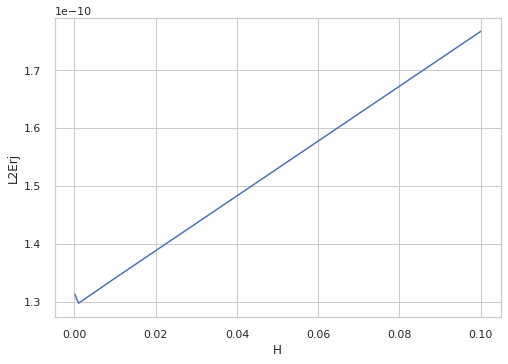

In [164]:
plt.plot(H,𝐿2𝐸𝑟𝑗)
plt.xlabel('H')
plt.ylabel("L2Erj")

end of q10